## EN2550: Assignment 03 on Object Counting on a Conveyor Belt

### Connected Component Analysis

#### Loading Images

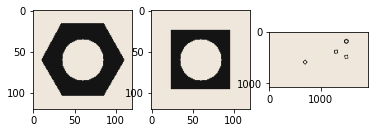

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

#### Otsu's Thresholding

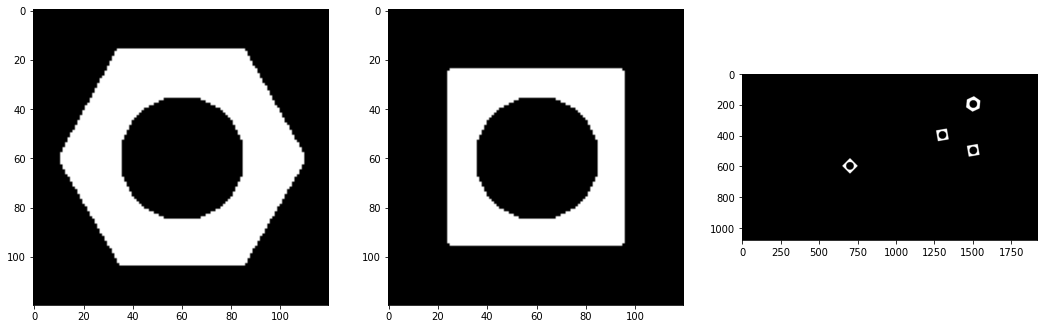

In [2]:
hexnut_template_gray = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
hexnut_template_blur = cv.GaussianBlur(hexnut_template_gray,(5,5),0)
ret3,hexnut_template_th = cv.threshold(hexnut_template_blur,0,255,cv.THRESH_BINARY_INV +cv.THRESH_OTSU)

squarenut_template_gray = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
squarenut_template_blur = cv.GaussianBlur(squarenut_template_gray,(5,5),0)
ret3,squarenut_template_th = cv.threshold(squarenut_template_blur,0,255,cv.THRESH_BINARY_INV +cv.THRESH_OTSU)

conveyor_f100_gray = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)
conveyor_f100_blur = cv.GaussianBlur(conveyor_f100_gray,(5,5),0)
ret3,conveyor_f100_th = cv.threshold(conveyor_f100_blur,0,255,cv.THRESH_BINARY_INV +cv.THRESH_OTSU)

fig, ax = plt. subplots(1,3, figsize = (18,6))
ax[0].imshow(hexnut_template_th, 'gray')
ax[1].imshow(squarenut_template_th, 'gray')
ax[2].imshow(conveyor_f100_th, 'gray')
plt.show()

#### Morphological Closing

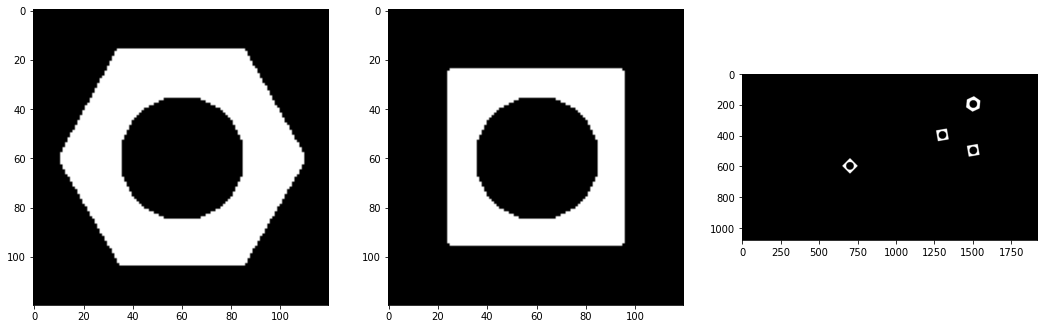

In [3]:
kernel = np.ones((3,3),np.uint8)

hexnut_template_closed = cv.morphologyEx(hexnut_template_th, cv.MORPH_CLOSE, kernel)
squarenut_template_closed = cv.morphologyEx(squarenut_template_th, cv.MORPH_CLOSE, kernel)
conveyor_f100_closed = cv.morphologyEx(conveyor_f100_th, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,3, figsize = (18,6))
ax[0].imshow(hexnut_template_closed, 'gray')
ax[1].imshow(squarenut_template_closed, 'gray')
ax[2].imshow(conveyor_f100_closed, 'gray')
plt.show()

#### Connected Component Analysis
https://www.programcreek.com/python/example/89340/cv2.connectedComponentsWithStats

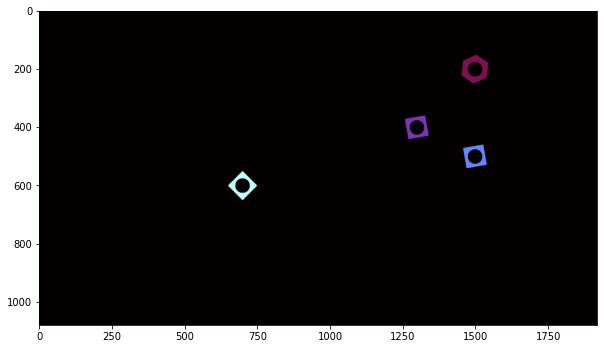

In [6]:
connectivity = 8
num_labels, labelmap, stats, centroids = cv.connectedComponentsWithStats(conveyor_f100_closed, connectivity)
colormapped = cv.applyColorMap((labelmap/np.amax(labelmap)*255).astype('uint8'), cv.COLORMAP_MAGMA)

fig, ax = plt. subplots(1,1, figsize=(10, 10))
ax.imshow(colormapped)
plt.show()

In [8]:
print(num_labels)
print(stats)
print(centroids)

5
[[      0       0    1920    1080 2059658]
 [   1454     150      92     100    4636]
 [   1259     359      82      82    3083]
 [   1459     459      82      82    3083]
 [    651     551      99      99    3140]]
[[ 957.36445274  540.44392516]
 [1499.24201898  199.28515962]
 [1299.18261434  399.18261434]
 [1499.18261434  499.18261434]
 [ 700.          600.        ]]


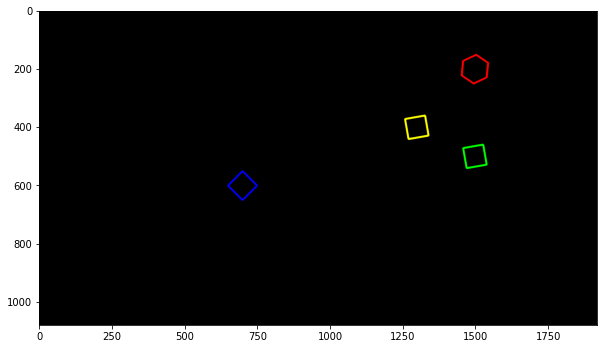

In [9]:
contours, hierarchy = cv.findContours(conveyor_f100_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
plot_image = np.zeros_like(conveyor_f100)
cv.drawContours(plot_image, contours, 0, (0,0,255), 5)
cv.drawContours(plot_image, contours, 1, (0,255,0), 5)
cv.drawContours(plot_image, contours, 2, (255,255,0), 5)
cv.drawContours(plot_image, contours, 3, (255,0,0), 5)
fig, ax = plt. subplots(1,1, figsize=(10, 10))
ax.imshow(plot_image,'gray')
plt.show()

### Detecting Objects on a Synthetic Conveyor

In [23]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
